# Notebook 3: Terrestrial ecosystems and climate change

In this notebook, we will read D&B csv files we saved in the last tutorial.\
We will do some inter-pft and inter-site GPP comparisons.\
We will explore the relations between GPP and temperature


# Setup working environment

Like before, we will use he `env_setup` script.

In [1]:
!pip install git+https://github.com/soonyenju/tccas.git -U --quiet

  Preparing metadata (setup.py) ... done


In [2]:
from tccas.env_setup import *

Do you want to prepare TCCAS? (y/n): n
Mounted at /content/drive
Skipping setup.
No module named 'netCDF4', so `netCDF4` is installing it for you...


# Let's fetch our backup results

In [7]:
bak_dir = Path('/content/drive/My Drive/tccas')

src = bak_dir / "bak" / "resources"
dst = root_proj / "resources"

for file in src.rglob("*"):  # rglob("*") = recursive
    if file.is_file():
        relative_path = file.relative_to(src)
        target = dst / relative_path
        target.parent.mkdir(parents=True, exist_ok=True)
        shutil.copy2(file, target)

print(f"✅ Copied all files from {src} to {dst}")

src = bak_dir / "bak" / "analysis"
dst = root_proj / "analysis"

for file in src.rglob("*"):  # rglob("*") = recursive
    if file.is_file():
        relative_path = file.relative_to(src)
        target = dst / relative_path
        target.parent.mkdir(parents=True, exist_ok=True)
        shutil.copy2(file, target)

print(f"✅ Copied all files from {src} to {dst}")

✅ Copied all files from /content/drive/My Drive/tccas/bak/resources to /content/tccas_r10043/resources
✅ Copied all files from /content/drive/My Drive/tccas/bak/analysis to /content/tccas_r10043/analysis


# D&B output data description

## Daily data

See the table below for what's in the daily data :)

| Variable | Variable Long Name | Variable Unit |
| --- | --- | --- |
|lon | longitude | degrees_west|
|lat | latitude | degrees_north|
|gidx | grid_cell_index | |
|pft | plant_function_type | |
|pft_fraction | fraction_of_plant_functional_type | |
|fc | fraction_covered_by_vegetation | |
|tl_c | long-wave (thermal) transmissivity of canopy | ???|
|ga | aerodynamic conductance between canopy and ref. height | m/s|
|fpasm | fraction of plant available soil moisture | |
|dprecip | daily precipitation | mm/d|
|dsoiltemp | daily soil temperature | Celsius|
|dtemp | daily air temperature | Celsius|
|gpp | daily gross primary production | gC/m2/d|
|raut | daily autotrophic respiration | gC/m2/d|
|snow | snow mass | kgH2O/m2|
|snowh | snow height | m|
|rho_bg | soil albedo | |
|rho_sn | snow albedo | |
|pevap_s | daily potential soil evaporation | mm/d|
|pevap_c | daily potential canopy evaporation | mm/d|
|evap_s | daily soil evaporation | mm/d|
|evap_c | daily canopy evaporation | mm/d|
|evap_sn | daily snow evaporation | mm/d|
|rain | daily rainfall | mm/d|
|snowf | daily snowfall | mm/d|
|smelt | daily snowmelt | mm/d|
|trans | daily transpiration | mm/d|
|ptrans | daily potential transpiration | mm/d|
|thruf | daily throughfall | mm/d|
|w_s | water in surface layer | kgH2O/m2|
|w_r | water in root layer | kgH2O/m2|
|fwvic | fraction of plant available soil moisture | |
|fw_s | fractional water content in surface layer | |
|fw_r | fractional water content in root layer | |
|nee | daily net ecosystem exchange | gC/m2/d|
|resh | daily heterotrophic respiration | gC/m2/d|
|lai | Leaf area index | m2/m2|
|labile_biomass | labile biomass | gC/m2|
|foliar_biomass | foliar biomass | gC/m2|
|woody_biomass | woody biomass | gC/m2|
|soil_organic_matter | soil_organic_matter | gC/m2|
|vod | vegetation_optical_depth | |
|slope | slope | dB/deg|
|fapar | Fraction of Absorbed Photosynthetically Active Radiation | |
|sif743 | Solar induced fluorescence at 743nm | mW/m2/sr/nm|


<!-- |w_c | water on leaves | kgH2O/m2| -->
<!-- |h_f | plant hydrological wetting status (fast changing) | | -->

## Hourly data

This below is what you can get from hourly data:

| Variable | Variable Long Name | Variable Unit |
| --- | --- | --- |
|swrad | incoming solar radiation | W/m2|
|temperature | 2meter air temperature | Celsius|
|raux | auxilary_respiration_variable | gC/m2/s|
|fapar | Fraction of Absorbed Photosynthetically Active Radiation | |
|sif | Solar induced fluorescence | mol/m2/s|
|trans | transpiration | kg/m2/s|
|pevap_soil | potential soil evaporation | kg/m2/s|
|pevap_canopy | potential canopy evaporation | kg/m2/s|
|temp_sd | soil temperature dry | Celsius|
|temp_sw | soil temperature wet | Celsius|
|temp_canopy | canopy temperature | Celsius|
|rn_s | net radiation soil | W/m2|
|rn_c | net radiation canopy | W/m2|
|vpd | vapour pressure deficit | Pa|
|rld | downwelling longwave radiation | W/m2|
|rlu | upwelling longwave radiation | W/m2|
|rho_tot | total albedo of canopy soil system | |
|gpp | gross primary production | gC/m2/s|
|raut | autotrophic respiration | gC/m2/s|
|rhet | heterotrophic respiration | gC/m2/s|
|nee | net ecosystem exchange flux | gC/m2/s|
|gs | stomatal conductance for water vapour | m/s|
|labile | labile | gC/m2|
|foliar | foliar | gC/m2|
|root | root | gC/m2|
|wood | wood | gC/m2|
|litter | litter | gC/m2|
|som | som | gC/m2|
|GPP | GPP | gC/m2/day|
|temprate | temprate | gC/m2/day|
|respiration_auto | respiration_auto | gC/m2/day|
|leaf_production | leaf_production | gC/m2/day|
|labile_production | labile_production | gC/m2/day|
|root_production | root_production | gC/m2/day|
|wood_production | wood_production | gC/m2/day|
|labile_release | labile_release | gC/m2/day|
|leaffall_factor | leaffall_factor | gC/m2/day|
|leaf_litter_production | leaf_litter_production | gC/m2/day|
|woodlitter_production | woodlitter_production | gC/m2/day|
|rootlitter_production | rootlitter_production | gC/m2/day|
|respiration_het_litter | respiration_het_litter | gC/m2/day|
|respiration_het_som | respiration_het_som | gC/m2/day|
|litter2som | litter2som | gC/m2/day|
|labrelease_factor | labrelease_factor | gC/m2/day|

# Load D&B output data

In [8]:
df_lm1_dd_C3Gr, df_lm1_dd_TmEv = load_DB_outputs('ES-LM1', root_proj, prior = True, freq = 'daily').values()
df_sod_dd_EvCn, df_sod_dd_EShr = load_DB_outputs('FI-Sod', root_proj, prior = True, freq = 'daily').values()

# Inter-PFT/site comparison <a class="anchor" id="section2"></a>

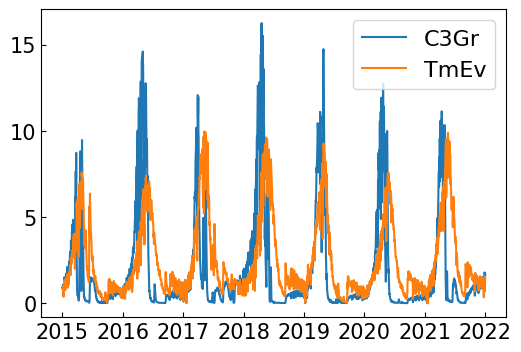

In [9]:
fig, ax = setup_canvas(1, 1, figsize = (6, 4))
ax.plot(df_lm1_dd_C3Gr['gpp'], label = 'C3Gr') # C3 grass
ax.plot(df_lm1_dd_TmEv['gpp'], label = 'TmEv') # Temperate broadleaf evergreen tree

ax.legend()
fig.savefig(root_proj.joinpath('analysis/gpp-timeseries_ES-LM1.png'))

TmEv is lower than PFT C3Gr, do you know what does this indicate?

It means weaker photosynthesis...

What caused this? May be the ecosystem type, i.e., the PFT itself?

What about the other site?

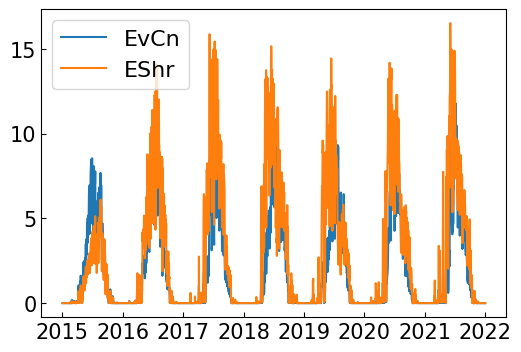

In [10]:
fig, ax = setup_canvas(1, 1, figsize = (6, 4))
ax.plot(df_sod_dd_EvCn['gpp'], label = 'EvCn') # Evergreen coniferous tree
ax.plot(df_sod_dd_EShr['gpp'], label = 'EShr') # Evergreen shrub

ax.legend()
fig.savefig(root_proj.joinpath('analysis/gpp-timeseries_FI-Sod.png'))

What about the variaitons across years?

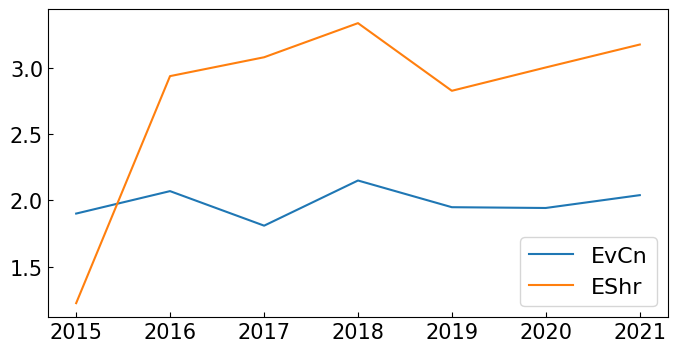

In [11]:
fig, ax = setup_canvas(1, 1, figsize = (8, 4))
ax.plot(df_sod_dd_EvCn['gpp'].resample('1YS').mean(), label = 'EvCn')
ax.plot(df_sod_dd_EShr['gpp'].resample('1YS').mean(), label = 'EShr')

ax.legend()

fig.savefig(root_proj.joinpath('analysis/gpp-two-pfts-interannual.png'))

What do you think about the trend?

<!-- We can spot a very little upward trend in site2, and maybe site1's GPP is decreasing? -->

How about the net carbon sequestration (Net Ecosystem Exchange, NEE),i.e. Reco (respiration) - GPP.
Positive values stand for a carbon source and negative for a carbon sink.

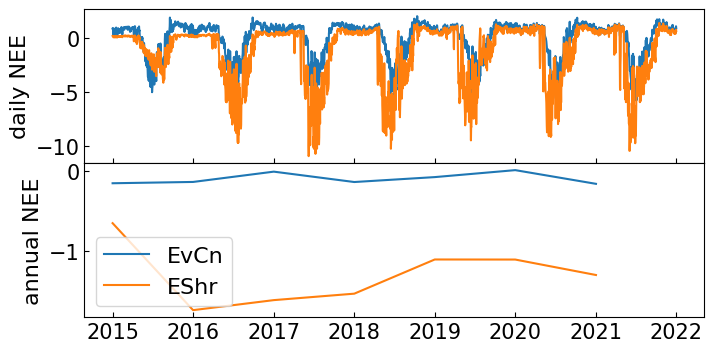

In [12]:
fig, axes = setup_canvas(2, 1, figsize = (8, 4), sharey = False)
ax = axes[0]
ax.plot(df_sod_dd_EvCn['nee'], label = 'EvCn')
ax.plot(df_sod_dd_EShr['nee'], label = 'EShr')
ax.set_ylabel('daily NEE')

ax = axes[1]
ax.plot(df_sod_dd_EvCn['nee'].resample('1YS').mean(), label = 'EvCn')
ax.plot(df_sod_dd_EShr['nee'].resample('1YS').mean(), label = 'EShr')
ax.set_ylabel('annual NEE')

ax.legend()
fig.savefig(root_proj.joinpath('analysis/nee-two-pfts.png'))

Source or sink?

Let's see what are the carbon dynamics of them...

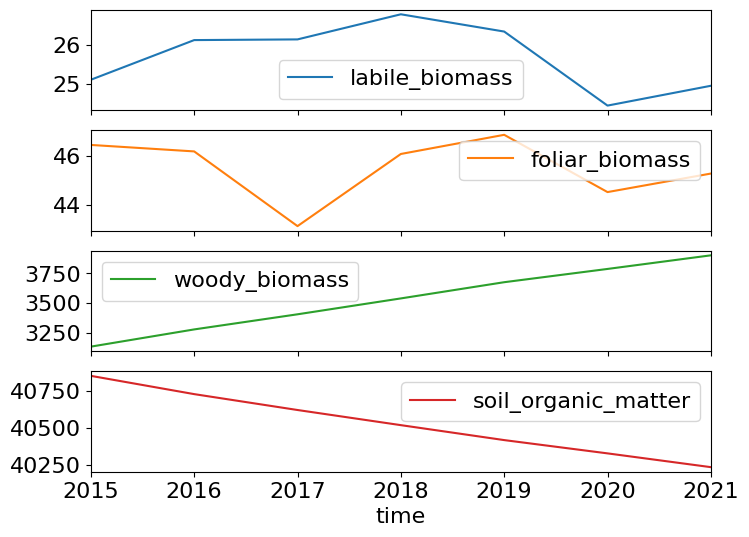

In [13]:
df_sod_dd_EvCn[['labile_biomass', 'foliar_biomass', 'woody_biomass',
       'soil_organic_matter']].resample('1YS').mean().plot(figsize = (8, 6), subplots = True)

fig = plt.gcf()
fig.savefig(root_proj.joinpath('analysis/pools_fluxes.png'))

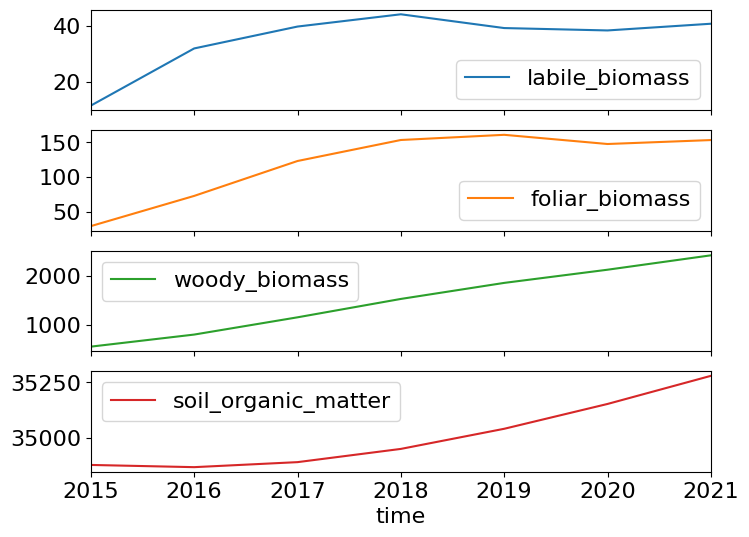

In [14]:
df_sod_dd_EShr[['labile_biomass', 'foliar_biomass', 'woody_biomass',
       'soil_organic_matter']].resample('1YS').mean().plot(figsize = (8, 6), subplots = True)

fig = plt.gcf()
fig.savefig(root_proj.joinpath('analysis/pools_fluxes_interannual.png'))

What increased and what decreased? Is the change in GPP of pft2 related to climate?

# Climate impact <a class="anchor" id="section3"></a>

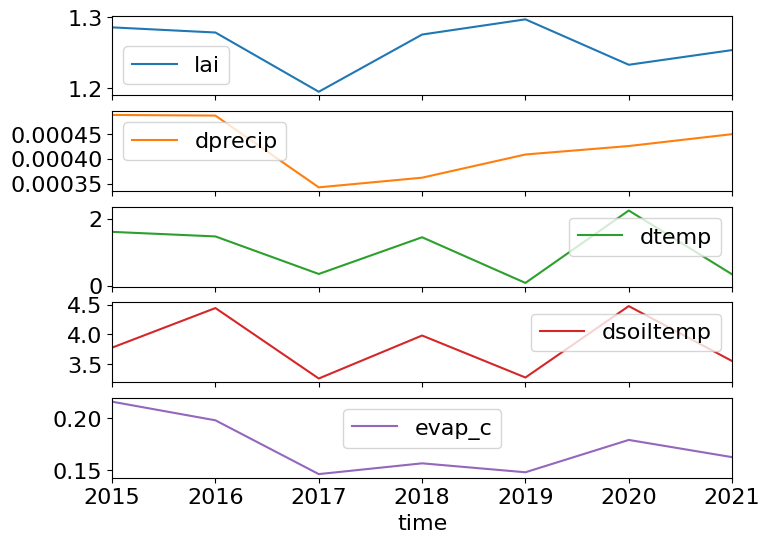

In [15]:
df_sod_dd_EvCn[['lai', 'dprecip', 'dtemp', 'dsoiltemp', 'evap_c']].resample('1YS').mean().plot(figsize = (8, 6), subplots = True)

fig = plt.gcf()
fig.savefig(root_proj.joinpath('analysis/climate.png'))

What caused the increased GPP? Temperature?

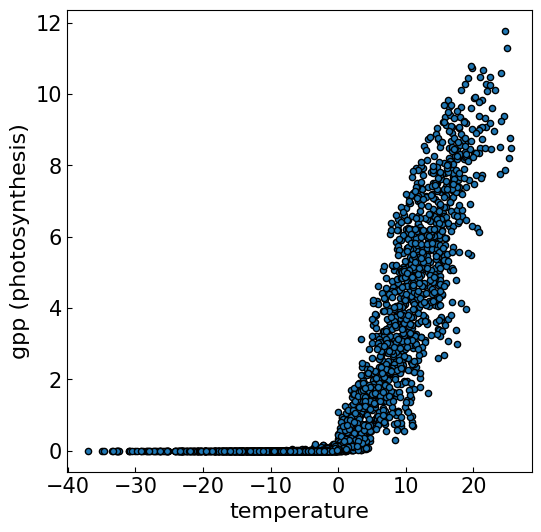

In [16]:
fig, ax = setup_canvas(1, 1, figsize = (6, 6))
ax.scatter(df_sod_dd_EvCn['dtemp'], df_sod_dd_EvCn['gpp'], s = 20, edgecolor = 'k')
ax.set_xlabel('temperature')
ax.set_ylabel('gpp (photosynthesis)')

fig = plt.gcf()
fig.savefig(root_proj.joinpath('analysis/temp-gpp-scatters.png'))

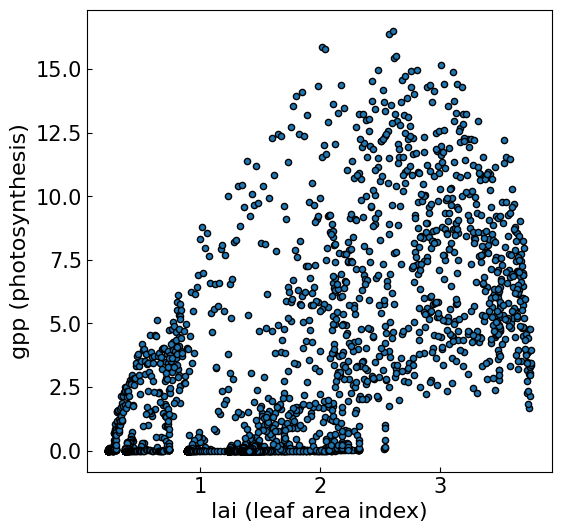

In [17]:
fig, ax = setup_canvas(1, 1, figsize = (6, 6))
ax.scatter(df_sod_dd_EShr['lai'], df_sod_dd_EShr['gpp'], s = 20, edgecolor = 'k')
ax.set_xlabel('lai (leaf area index)')
ax.set_ylabel('gpp (photosynthesis)')

fig = plt.gcf()
fig.savefig(root_proj.joinpath('analysis/lai-gpp-scatters.png'))

# Let's backup our results

In [18]:
src = root_proj / "resources"
dst = bak_dir / "bak" / "resources"

for file in src.rglob("*"):  # rglob("*") = recursive
    if file.is_file():
        relative_path = file.relative_to(src)
        target = dst / relative_path
        target.parent.mkdir(parents=True, exist_ok=True)
        shutil.copy2(file, target)

print(f"✅ Copied all files from {src} to {dst}")

src = root_proj / "analysis"
dst = bak_dir / "bak" / "analysis"

for file in src.rglob("*"):  # rglob("*") = recursive
    if file.is_file():
        relative_path = file.relative_to(src)
        target = dst / relative_path
        target.parent.mkdir(parents=True, exist_ok=True)
        shutil.copy2(file, target)

print(f"✅ Copied all files from {src} to {dst}")

✅ Copied all files from /content/tccas_r10043/resources to /content/drive/My Drive/tccas/bak/resources
✅ Copied all files from /content/tccas_r10043/analysis to /content/drive/My Drive/tccas/bak/analysis


# Practices and questions <a class="anchor" id="section4"></a>

What are your interpretations? What about other climate changes? What the future do you think will be?